# 1. Install Dependencies and Setup

In [5]:
!pip install Pillow


In [ ]:
!pip list



In [ ]:
print("shs")

In [ ]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-02-24 21:00:35.627823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 21:00:35.866787: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 21:00:35.866950: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [1]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/tmp/ipykernel_18745/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
os.listdir(data_dir)

['sad', 'happy']

In [7]:
os.listdir(os.path.join(data_dir,'happy'))

['image31.jpeg',
 'images21.jpg',
 'images12.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'images14.jpg',
 'images22.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 'How_Happy_Are_People_at_Work.jpg',
 'habits-of-happy-people.jpg',
 'image20.jpeg',
 'images30.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'happy-people-702x336.jpg',
 'image23.jpeg',
 '1902587.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'image18.jpeg',
 'physed-happiness-facebookJumbo.jpg',
 'image32.png',
 'happy-people-13772392.jpg',
 '60632274._UY200_.jpg',
 'image5.jpeg',
 'image.jpeg',
 'images.jpg',
 '170404-happy-workers-feature.jpg',
 'images5.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'blog_image_20180219221810890.jpg',
 '1-2.jpg',
 'images11.jpg',
 'brady-bunch-3.jpg',
 'Happy-people-800x533.jpg',
 'image30.jpeg',
 'image19.jpeg',
 'happy-people-black-a

In [2]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
img=cv2.imread(os.path.join('data','happy','image31.jpeg'))

NameError: name 'os' is not defined

In [ ]:
img.shape

In [ ]:
type(img)

In [ ]:
plt.imshow(img)

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

NameError: name 'tf' is not defined

In [6]:
data_iterator = data.as_numpy_iterator()

NameError: name 'data' is not defined

In [7]:
data_iterator

NameError: name 'data_iterator' is not defined

In [8]:
batch = data_iterator.next()

NameError: name 'data_iterator' is not defined

In [9]:
batch

NameError: name 'batch' is not defined

In [10]:
batch[0].shape

NameError: name 'batch' is not defined

In [11]:
#Class1 =  sad people 
#Class0 =  happy people
batch[1]

NameError: name 'batch' is not defined

NameError: name 'batch' is not defined

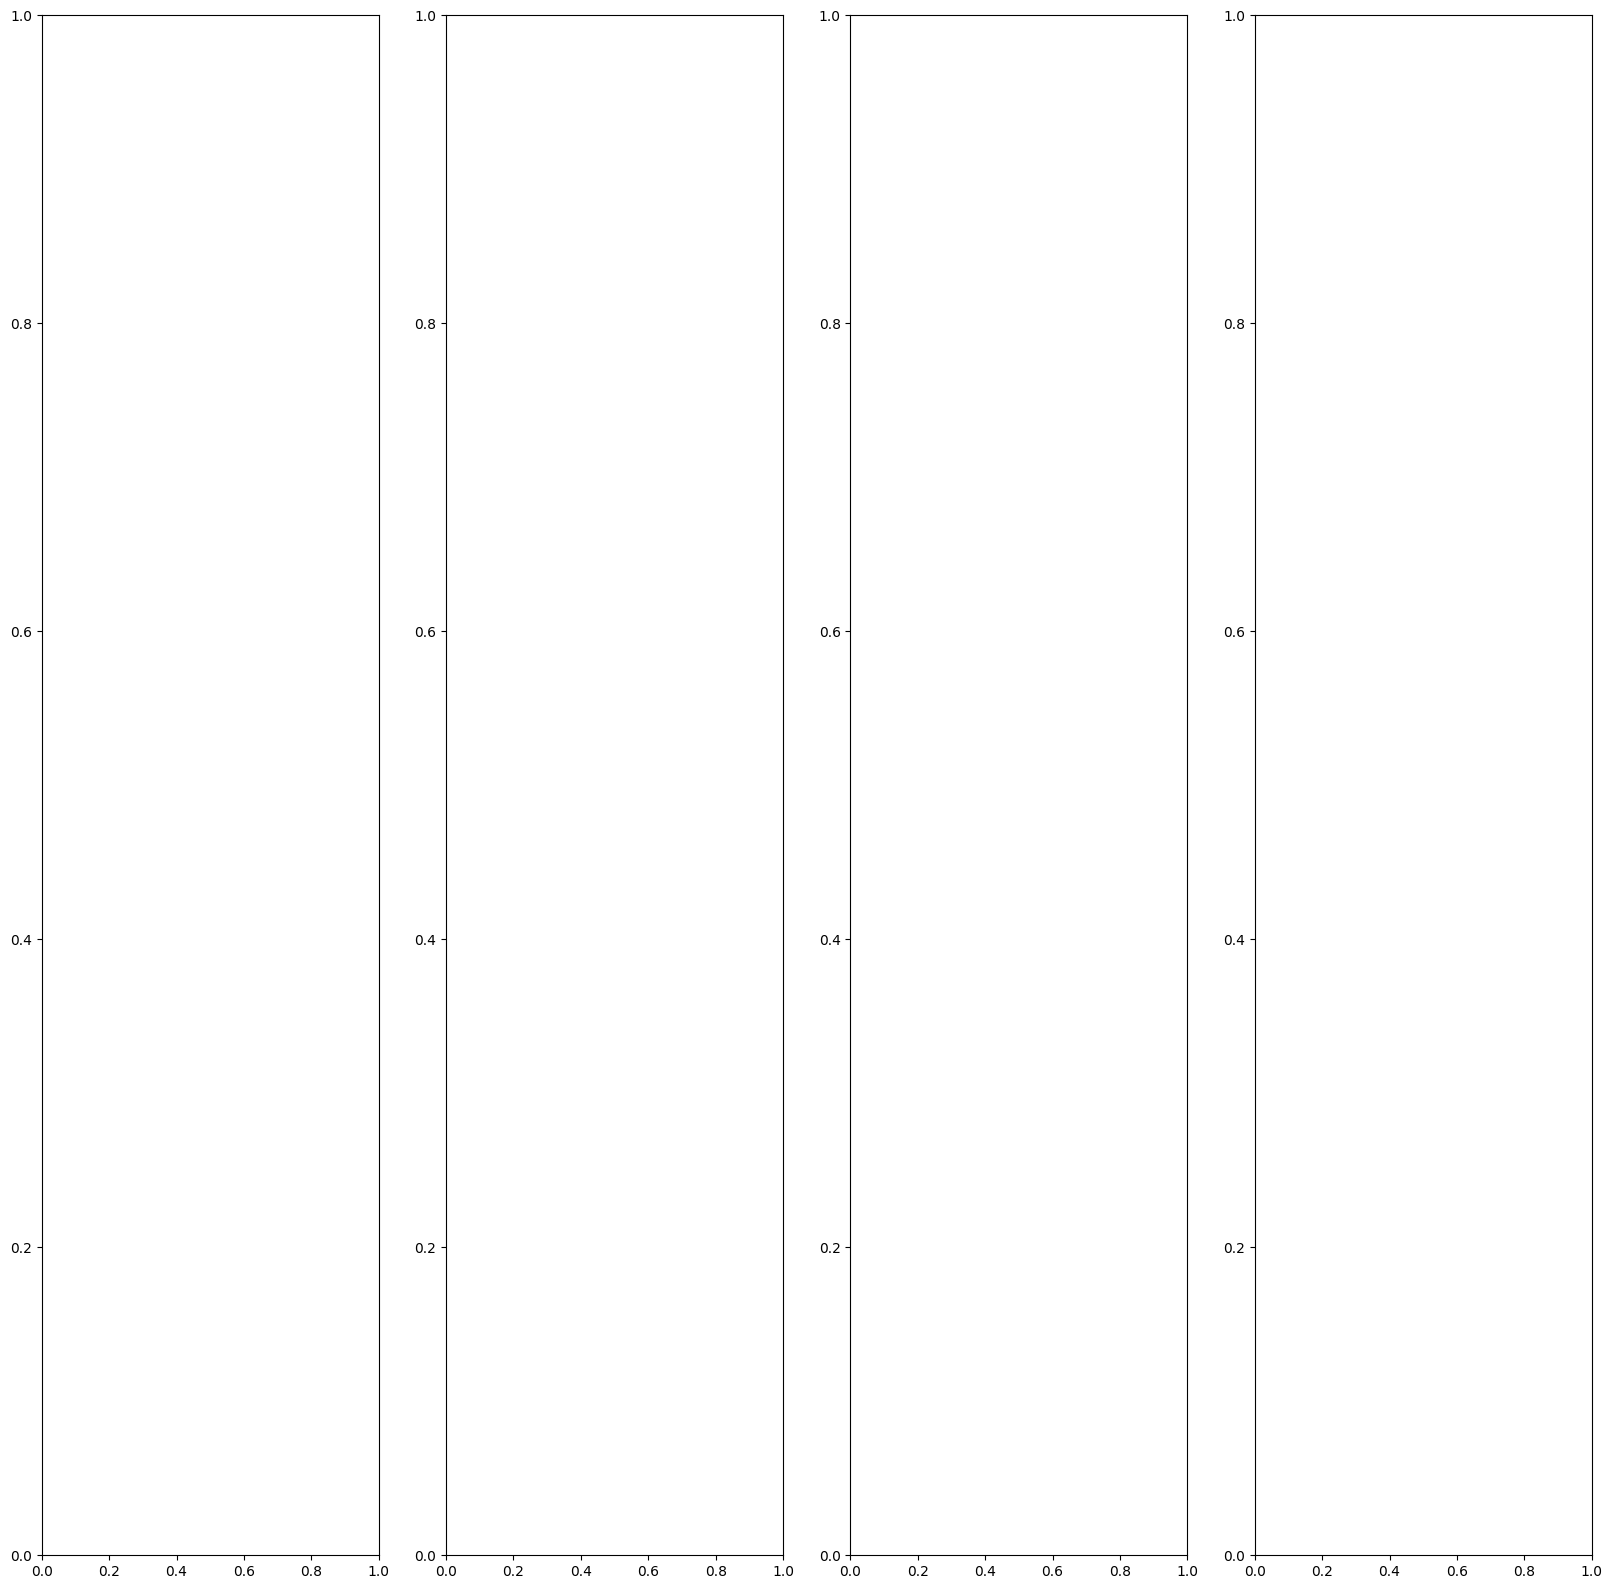

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         [[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         [[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         ...,
 
         [[0.12156863, 0.12156863, 0.12156863],
          [0.12156

In [25]:
len(data)

10

# 5. Split Data  . 

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size+val_size+test_size

10

In [28]:
val_size

2

In [29]:
test_size

1

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-02-24 21:00:52.048042: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-02-24 21:00:53.327529: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe830ca8310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-24 21:00:53.327551: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-02-24 21:00:53.342313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708788653.437265   11438 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 7s 262ms/step - loss: 1.6260 - accuracy: 0.4866 - val_loss: 0.6827 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 3s 241ms/step - loss: 0.6791 - accuracy: 0.6741 - val_loss: 0.6887 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 3s 248ms/step - loss: 0.6776 - accuracy: 0.6339 - val_loss: 0.6466 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 3s 244ms/step - loss: 0.6197 - accuracy: 0.7679 - val_loss: 0.5291 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 3s 254ms/step - loss: 0.5419 - accuracy: 0.7054 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 3s 252ms/step - loss: 0.4745 - accuracy: 0.7768 - val_loss: 0.3503 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 3s 303ms/step - loss: 0.4683 - accuracy: 0.7679 - val_loss: 0.4360 - val_accuracy: 0.8125
Epoch 8/20
7/7 [===============

In [175]:
hist.history

{'loss': [0.0031549353152513504,
  0.006202325224876404,
  0.006192812230437994,
  0.0031499972101300955,
  0.006192888133227825,
  0.006213034503161907,
  0.0062347655184566975,
  0.0030704685486853123,
  3.1845536341279512e-06,
  0.006241994444280863,
  3.3111371067207074e-06,
  0.0033132066018879414,
  0.0032424014061689377,
  0.006241184659302235,
  0.006207860074937344,
  3.528090701365727e-06,
  0.006193435285240412,
  0.0030990911182016134,
  3.207064992238884e-06,
  0.006289136596024036,
  0.0033016849774867296,
  0.007125542499125004,
  0.0038953579496592283,
  0.007348909042775631,
  0.00026709173107519746,
  0.006531876977533102,
  0.006465139798820019,
  0.003027918515726924,
  0.0063812765292823315,
  0.006336119957268238,
  0.006271660327911377,
  0.0063760047778487206,
  2.053641037491616e-05,
  0.0062739369459450245,
  0.0028308439068496227,
  0.006308960262686014,
  0.006264773663133383,
  0.006305094808340073,
  0.006262931972742081,
  1.8688599084271118e-05,
  0.0062

# 8. Plot Performance

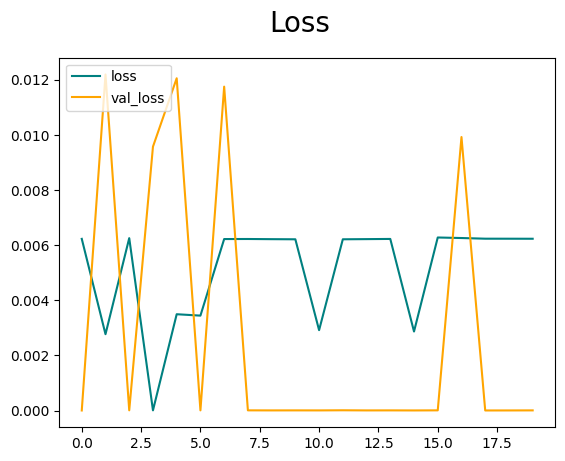

In [212]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

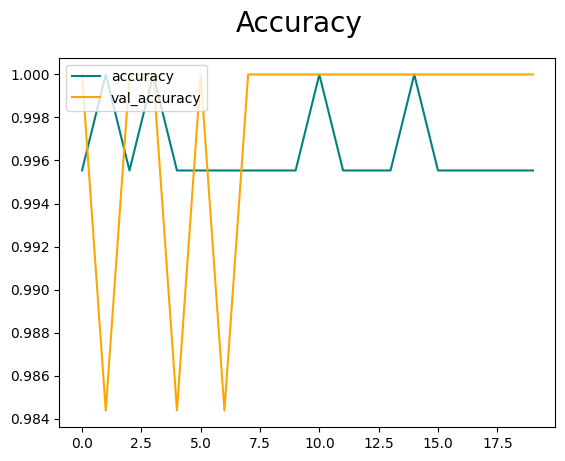

In [213]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [214]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [215]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [216]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 16ms/step


In [217]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


# 10. Test

In [218]:
import cv2

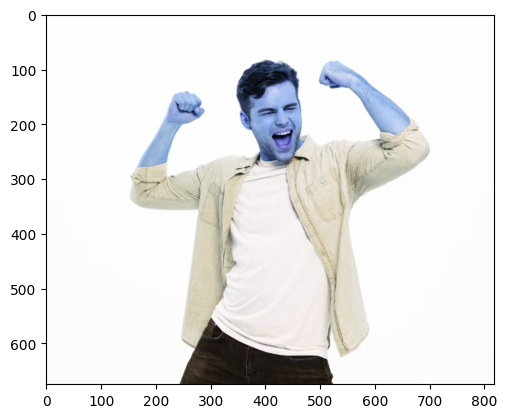

In [219]:
img = cv2.imread('Screenshot from 2024-02-24 17-38-52.png')
plt.imshow(img)
plt.show()

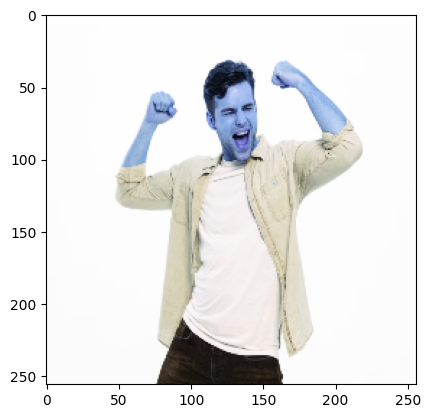

In [220]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [221]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


In [222]:
yhat

array([[0.9999554]], dtype=float32)

In [223]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [200]:
from tensorflow.keras.models import load_model

In [201]:
model.save(os.path.join('models','happysadmodel.h5'))

/home/aman/Desktop/ImageClassification/imageclassification/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [203]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [204]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 53ms/step


In [205]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
